In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [13]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [15]:
# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

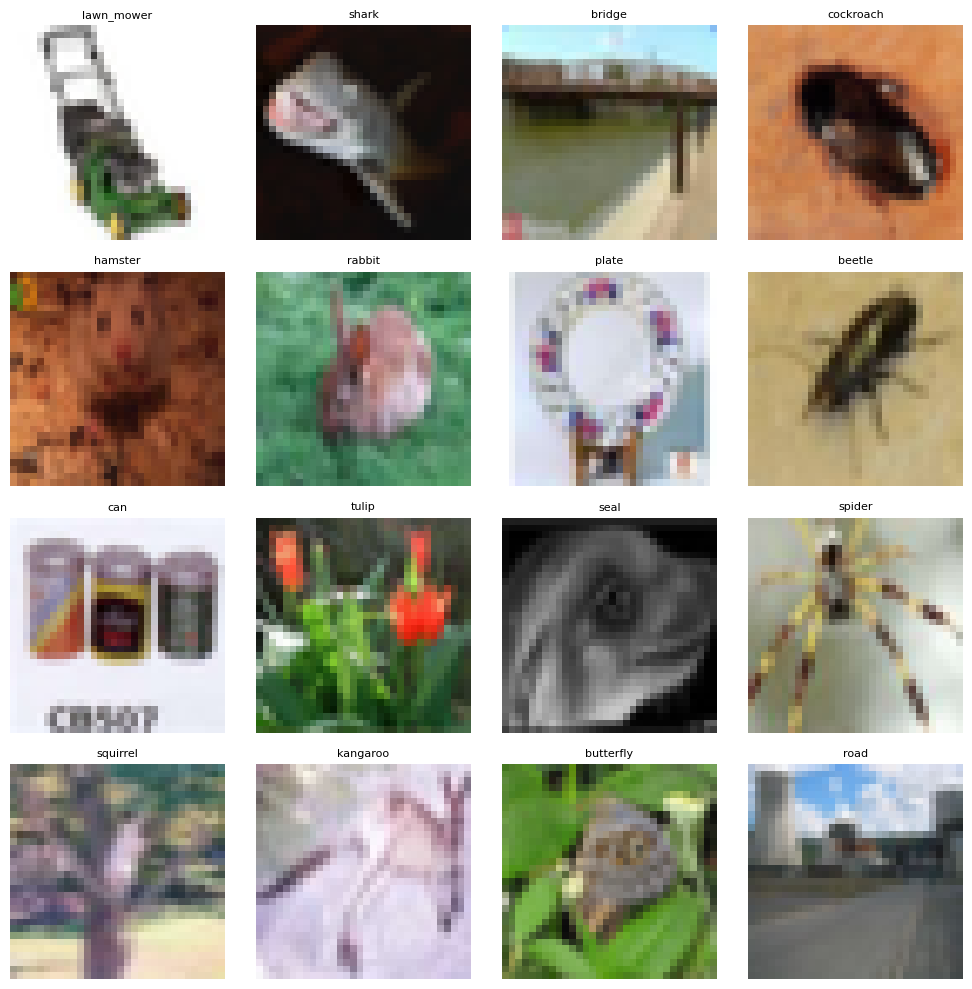

In [14]:
import numpy as np

# CIFAR-100 Class Labels
cifar100_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose",
    "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel",
    "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

# Plot Some Random Images from CIFAR-100
plt.figure(figsize=(10, 10))
for i in range(16):  # Show 16 images
    plt.subplot(4, 4, i + 1)
    rand_idx = np.random.randint(len(x_train))  # Select a random image
    img = x_train[rand_idx]
    label = cifar100_labels[y_train[rand_idx][0]]

    plt.imshow(img)
    plt.title(label, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')  # 100 classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train Model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0381 - loss: 4.3694 - val_accuracy: 0.1647 - val_loss: 3.5406
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1462 - loss: 3.6024 - val_accuracy: 0.2211 - val_loss: 3.2187
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2030 - loss: 3.2887 - val_accuracy: 0.2629 - val_loss: 2.9964
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2405 - loss: 3.0896 - val_accuracy: 0.2921 - val_loss: 2.8403
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2696 - loss: 2.9331 - val_accuracy: 0.3099 - val_loss: 2.7512
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2938 - loss: 2.8083 - val_accuracy: 0.3311 - val_loss: 2.6875
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3125 - loss: 2.7087 - val_accuracy: 0.3547 - val_loss: 2.5744
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3316 - loss: 2.6144 - val_accuracy: 

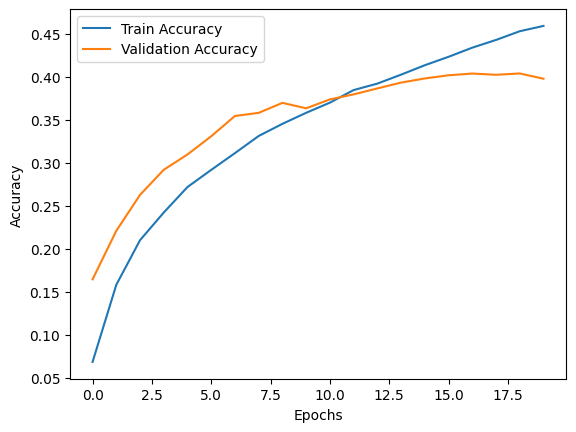

In [5]:
# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define Optimized CNN Model
model2 = models.Sequential([
    layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')  # 100 classes
])

# Compile Model (Using SGD with Momentum)
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Print Model Summary
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │              

 Total params: 1,332,132 (5.08 MB)

 Trainable params: 1,330,212 (5.07 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Data Augmentation for Training Set
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Create Augmented Training Generator
train_generator = datagen.flow(x_train, y_train, batch_size=128)

# Learning Rate Scheduler
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6
)

# Train Model with Augmentation
history=model2.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(x_train) // 64,  # Ensure full dataset coverage
    validation_data=(x_test, y_test),  # No augmentation for validation data
    callbacks=[lr_schedule]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/781 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.0434 - loss: 4.6965

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.0526 - loss: 4.5417 - val_accuracy: 0.0456 - val_loss: 4.5072 - learning_rate: 0.0100
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.1110 - loss: 3.9175 - val_accuracy: 0.1040 - val_loss: 4.0316 - learning_rate: 0.0100
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.1587 - loss: 3.5525 - val_accuracy: 0.1921 - val_loss: 3.4203 - learning_rate: 0.0100
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.2098 - loss: 3.2363 - val_accuracy: 0.2372 - val_loss: 3.1507 - learning_rate: 0.0100
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.2514 - loss: 2.9792 - val_accuracy: 0.2281 - val_loss: 3.2573 - learning_rate: 0.0100
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.2850 - loss: 2.7889 - val_accuracy: 0.3350 - val_loss: 2.5698 - learning_rate: 0.0100
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.3199 - loss: 2.6305

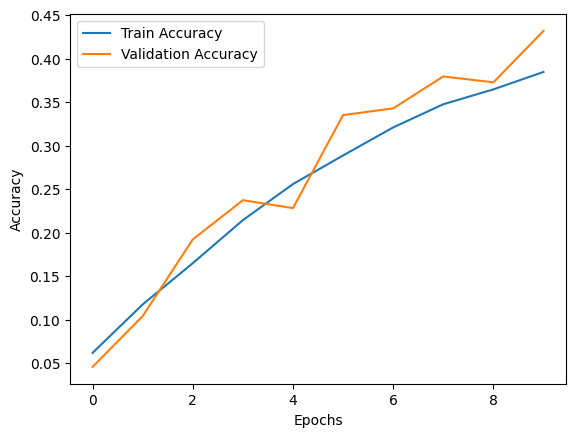

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

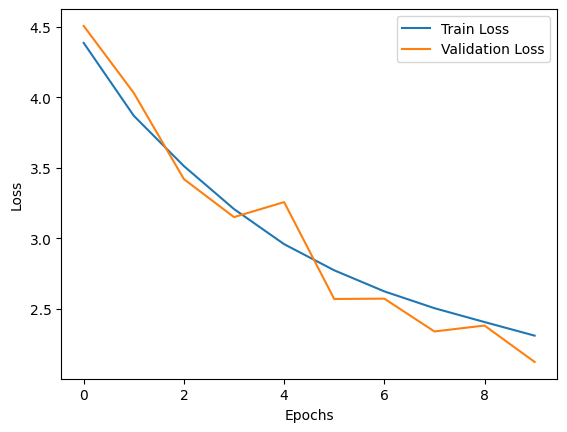

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
history=model2.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(x_train) // 64,
    validation_data=(x_test, y_test),
    callbacks=[lr_schedule]
)

Epoch 1/10
391/781 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.4068 - loss: 2.2349

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.4045 - loss: 2.2398 - val_accuracy: 0.3882 - val_loss: 2.3860 - learning_rate: 0.0100
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.4198 - loss: 2.1713 - val_accuracy: 0.4126 - val_loss: 2.2181 - learning_rate: 0.0100
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.4259 - loss: 2.1207 - val_accuracy: 0.4420 - val_loss: 2.1342 - learning_rate: 0.0100
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.4392 - loss: 2.0760 - val_accuracy: 0.4301 - val_loss: 2.2296 - learning_rate: 0.0100
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4505 - loss: 2.0266 - val_accuracy: 0.4529 - val_loss: 2.0857 - learning_rate: 0.0100
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4659 - loss: 1.9684 - val_accuracy: 0.4609 - val_loss: 2.0958 - learning_rate: 0.0100
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4713 - loss: 1.9347

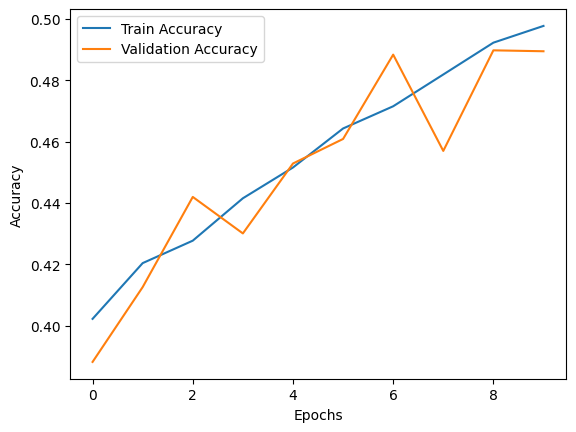

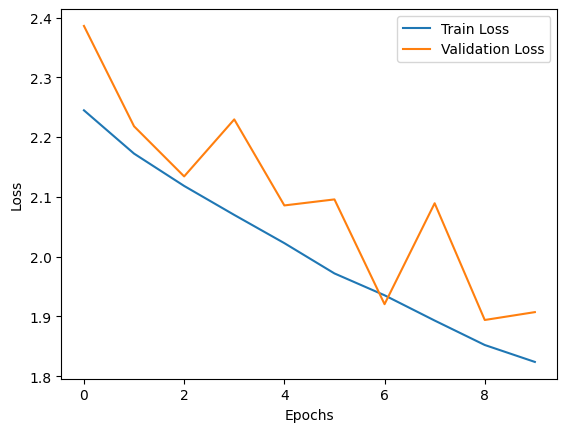

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
history=model2.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(x_train) // 64,
    validation_data=(x_test, y_test),
    callbacks=[lr_schedule]
)

Epoch 1/20
391/781 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.5089 - loss: 1.7741

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5086 - loss: 1.7759 - val_accuracy: 0.5121 - val_loss: 1.8764 - learning_rate: 0.0100
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5178 - loss: 1.7422 - val_accuracy: 0.5237 - val_loss: 1.7779 - learning_rate: 0.0100
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.5209 - loss: 1.7225 - val_accuracy: 0.5103 - val_loss: 1.8933 - learning_rate: 0.0100
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.5318 - loss: 1.7003 - val_accuracy: 0.5334 - val_loss: 1.7569 - learning_rate: 0.0100
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.5338 - loss: 1.6729 - val_accuracy: 0.5302 - val_loss: 1.7885 - learning_rate: 0.0100
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5385 - loss: 1.6665 - val_accuracy: 0.5563 - val_loss: 1.6590 - learning_rate: 0.0100
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.5403 - loss: 1.6471

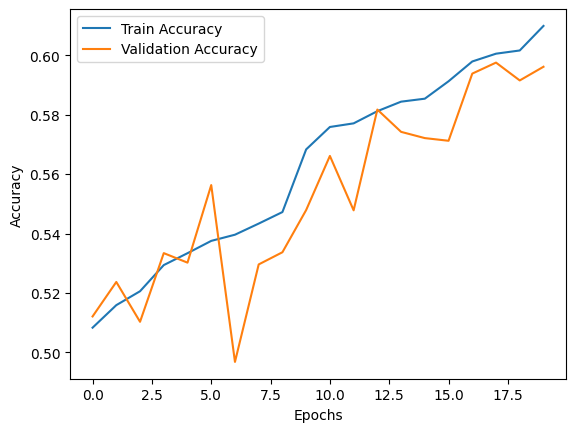

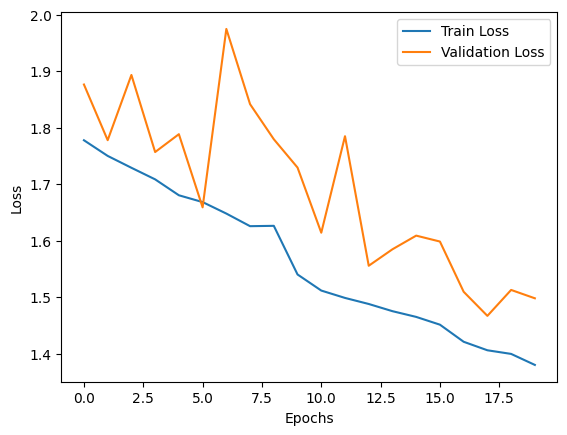

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [33]:
# Make Predictions
y_pred_probs = model.predict(x_test)  # Get class probabilities (10000, 100)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert (10000, 100) → (10000,)

# Convert One-Hot Encoded y_test to Class Labels
y_true = np.argmax(y_test, axis=1)  # Convert (10000, 100) → (10000,)

# Verify Shapes
print(f"y_true shape: {y_true.shape}")  # Expected: (10000,)
print(f"y_pred shape: {y_pred.shape}")  # Expected: (10000,)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_true shape: (10000,)
y_pred shape: (10000,)


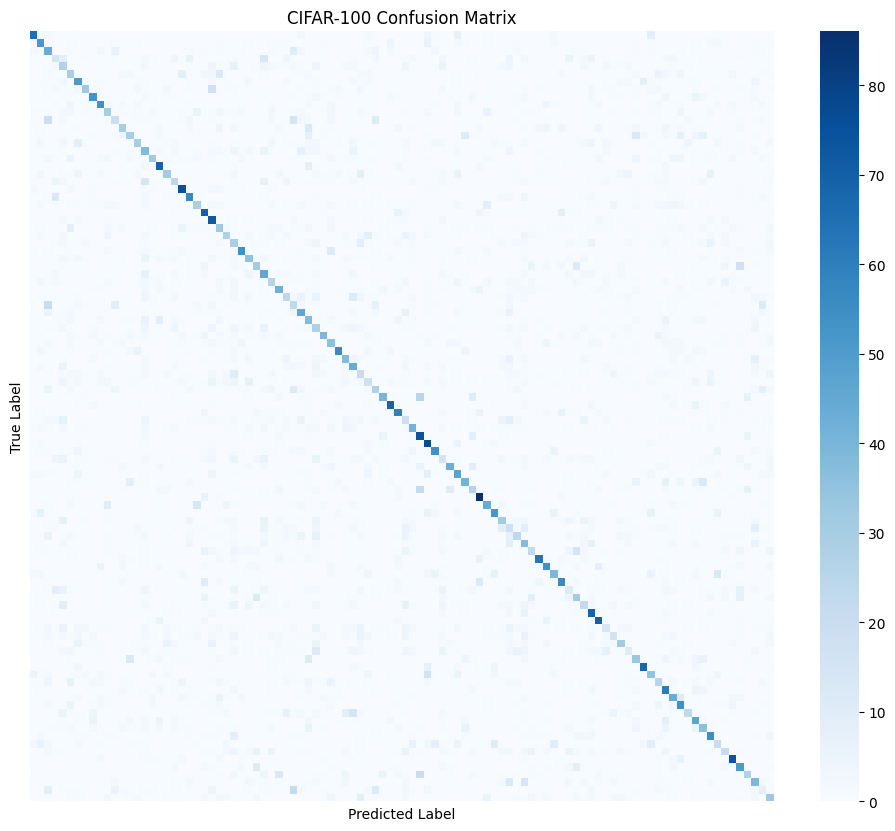

In [34]:
# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', annot=False, xticklabels=False, yticklabels=False)
plt.title("CIFAR-100 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()